# Capstone Project - The Battle of Neighborhoods
<br>
This Notebook is part of the final assignment for Course 9 of Data Science with IBM at Coursera.
<br> The content is segmented into the following parts:
<br> <br> Section 1: Introduction into the research problem
<br> Section 2: Installation and loading of ncesessary packages
<br> Section 3: Data sourcing and processing
<br> Section 4: Methodology
<br> Section 5: Data analysis, visualization and discussion of results
<br> Section 6: Conclusion

## Section 1: Introduction into the research problem
<br>

Frankfurt am Main is the fifth largest city in Germany, located in the centre of Germany. With its vibrant city-life, a wide range of employers and renewed universities, Frankfurt is an attractive city for students and young professionals not only from Germany. Throughout the past decade, the city witnessed a steady increase in inhabitants leading to in higher demand of apartments and houses in all neighborhoods. 
<br> This research will focus on the analysis of neighborhoods in Frankfurt. The aim is to analyse the attractiviness of each neighborhood based on the possibilies for going-out.   

## Section 2: Installation and loading of necesary packages
<br>


In [1]:
#Install all packages required for further the Capstone Project
!pip install pandas
!pip install lxml
!pip install html5lib
!pip install BeautifulSoup4
!pip install geopandas
!pip install geopy
!pip install geocoder
print("Succesful installation")

     |████████████████████████████████| 921kB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 13.1MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 21.2MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 102kB 3.2MB/s ta 0:00:01
Succesful installation


In [2]:
#!conda install -c conda-forge folium=0.5.0 --yes
!pip install folium
import folium

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
print("Succesful installation")

     |████████████████████████████████| 92kB 10.1MB/s eta 0:00:01
Succesful installation


## Section 3: Data sourcing and processing
<br>
Data for all neighborhoods in Frankfurt am Main is scraped from Wikipedia. Columns with data not needed for further analysis are dropped. Furthermore, some columns required further cleaning to enable frictionless analysis. All steps are listed below with a short description explaning the data cleaning process. 
<br>Geographic coordinates for each neighborhood are sourced using the Nominatim Geocoding service and appended to the data frame.  


In [41]:
#Read the table from Wikipedia as data frame with pandas
df_frankfurt = pd.read_html('https://de.wikipedia.org/wiki/Liste_der_Stadtteile_von_Frankfurt_am_Main')[0]

print(df_frankfurt.shape)
df_frankfurt.head()

(47, 13)


,Nr.,Stadtteil,Fläche[3]in km²,Einwohner,Weiblich,Männlich,Deutsche,Ausländer,Ausländerin Prozent,Einwohnerje km²,Ortsbezirk,Stadtgebietseit,Vorherige Zugehörigkeit
0,1,Altstadt,NaN,NaN,NaN,NaN,NaN,NaN,373,8204,01 Innenstadt I,1866[Anm. 1],Freie Stadt Frankfurt
1,2,Innenstadt,NaN,NaN,NaN,NaN,NaN,NaN,468,4430,01 Innenstadt I,1866[Anm. 2],Freie Stadt Frankfurt
2,3,Bahnhofsviertel,NaN,NaN,NaN,NaN,NaN,NaN,54,6570,01 Innenstadt I,1866[Anm. 3],Freie Stadt Frankfurt
3,4,Westend-Süd,NaN,NaN,NaN,NaN,NaN,NaN,275,7538,02 Innenstadt II,1866[Anm. 3],Freie Stadt Frankfurt
4,5,Westend-Nord,NaN,NaN,NaN,NaN,NaN,NaN,293,6249,02 Innenstadt II,1866[Anm. 3],Freie Stadt Frankfurt


In [42]:
# Create new datafram with selected variables only
df_new = df_frankfurt[['Nr.','Stadtteil', 'Einwohnerje km²','Stadtgebietseit']]

# Rename column names to the English term
df_new.rename(columns={'Nr.': 'Number', 'Stadtteil': 'Neighborhood', 'Einwohnerje km²': 'Citizens per km²', 'Stadtgebietseit': 'Neighborhood since'}, inplace=True)

# Remove all values within and including the brackets at the column "Neighberhood since"
df_new['Neighborhood since'].replace(regex=True,inplace=True,to_replace=r'\[.*\]',value=r'')

# Remove all values within and including the brackets at the column "Number"
df_new['Number'].replace(regex=True,inplace=True,to_replace=r'\[.*\]',value=r'')

# Remove all values that come after / in the columns "Neighborhood since"
df_new['Neighborhood since'].replace(regex=True,inplace=True,to_replace=r'\/.*',value=r'')

df_new.drop(df_new.index[14], inplace = True)
df_new.drop(df_new.index[45], inplace = True)

df_new['Address'] = df_new['Neighborhood'].astype(str) + ', Frankfurt am Main, Germany'

print(df_new.shape)
df_new.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(45, 5)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Number,Neighborhood,Citizens per km²,Neighborhood since,Address
0,1,Altstadt,8204,1866,"Altstadt, Frankfurt am Main, Germany"
1,2,Innenstadt,4430,1866,"Innenstadt, Frankfurt am Main, Germany"
2,3,Bahnhofsviertel,6570,1866,"Bahnhofsviertel, Frankfurt am Main, Germany"
3,4,Westend-Süd,7538,1866,"Westend-Süd, Frankfurt am Main, Germany"
4,5,Westend-Nord,6249,1866,"Westend-Nord, Frankfurt am Main, Germany"


In [43]:
# Extract the geographical coordinates for all 45 city districts

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [44]:
locator = Nominatim(user_agent="myGeocoder")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.1)
df_new['Location'] = df_new['Address'].apply(geocode)
df_new['Point'] = df_new['Location'].apply(lambda loc: tuple(loc.point) if loc else None)
df_new.head()

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Nied, Frankfurt am Main, Germany',), **{}).
Traceback (most recent call last):
  File "/opt/conda/envs/Python36/lib/python3.6/urllib/request.py", line 1318, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1254, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1300, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1249, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 1036, in _send_output
    self.send(msg)
  File "/opt/conda/envs/Python36/lib/python3.6/http/client.py", line 974, in send
    self.connect()
  File "/opt/conda/envs/Python36/lib/pyt

,Number,Neighborhood,Citizens per km²,Neighborhood since,Address,Location,Point
0,1,Altstadt,8204,1866,"Altstadt, Frankfurt am Main, Germany","(Altstadt, Frankfurt am Main, Hessen, 60311, D...","(50.11044205, 8.682901089428581, 0.0)"
1,2,Innenstadt,4430,1866,"Innenstadt, Frankfurt am Main, Germany","(Innenstadt, Frankfurt am Main, Hessen, Deutsc...","(50.1129932, 8.674341444481126, 0.0)"
2,3,Bahnhofsviertel,6570,1866,"Bahnhofsviertel, Frankfurt am Main, Germany","(Bahnhofsviertel, Frankfurt am Main, Hessen, 6...","(50.10774145, 8.66867603609037, 0.0)"
3,4,Westend-Süd,7538,1866,"Westend-Süd, Frankfurt am Main, Germany","(Westend Süd, Frankfurt am Main, Hessen, Deuts...","(50.1152448, 8.6622696, 0.0)"
4,5,Westend-Nord,6249,1866,"Westend-Nord, Frankfurt am Main, Germany","(Westend Nord, Frankfurt am Main, Hessen, 6052...","(50.1263563, 8.6679209, 0.0)"


In [45]:
# Seperate the coordinates into different columns with respective names

df_new[['Latitude', 'Longitude', 'Altitude']] = pd.DataFrame(df_new['Point'].tolist(), index=df_new.index)
df_new = df_new.drop(['Location', 'Point', 'Altitude'], axis=1)
print(df_new.shape)
df_new.head(12)

(45, 7)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Number,Neighborhood,Citizens per km²,Neighborhood since,Address,Latitude,Longitude
0,1,Altstadt,8204,1866,"Altstadt, Frankfurt am Main, Germany",50.110442,8.682901
1,2,Innenstadt,4430,1866,"Innenstadt, Frankfurt am Main, Germany",50.112993,8.674341
2,3,Bahnhofsviertel,6570,1866,"Bahnhofsviertel, Frankfurt am Main, Germany",50.107741,8.668676
3,4,Westend-Süd,7538,1866,"Westend-Süd, Frankfurt am Main, Germany",50.115245,8.662270
4,5,Westend-Nord,6249,1866,"Westend-Nord, Frankfurt am Main, Germany",50.126356,8.667921
5,6,Nordend-West,9845,1866,"Nordend-West, Frankfurt am Main, Germany",50.124914,8.677950
6,7,Nordend-Ost,15031,1866,"Nordend-Ost, Frankfurt am Main, Germany",50.124920,8.692317
7,8,Ostend,5243,1866,"Ostend, Frankfurt am Main, Germany",50.115935,8.720546
8,9,Bornheim,10959,1877,"Bornheim, Frankfurt am Main, Germany",50.133056,8.714932
9,10,Gutleutviertel,3864,1866,"Gutleutviertel, Frankfurt am Main, Germany",50.097925,8.648964


## Section 4: Methodology

**Secondary data** is sourced from Wikipedia and Foursquare for the analysis of neighborhoods in Frankfurt. 
<br>The data is analysed using **quantitative techniques** such as **descriptive statistics** and **clustering algorithms**. 
<br>In addition, several **visualizaitons** are taken to demonstrate the findings in geographical context. 

## Section 5: Data analysis, visualization and discussion of results

**Neighborhood visualization**
<br>The German city Frankfurt am Main is presented in the map below. The centres of all 45 neighborhoods are visually highlighted with a blue dot.  

In [8]:
address = 'Frankfurt am Main, Germany'

geolocator = Nominatim(user_agent="myGeocoder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 50.1106444, 8.6820917.


In [9]:
# create map of Frankfurt using latitude and longitude values
map_ffm = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, neighborhood in zip(df_new['Latitude'], df_new['Longitude'], df_new['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='darkblue',
        fill_opacity=0.1,
        parse_html=False).add_to(map_ffm)  


map_ffm

<br> 
**Population density**
<br>In the following, a graph with all neighborhoods and der number of citizens per square kilometres is shown. The neighberhoods are ordered in descending order from left to right. The graphs shows that only the two neighborhoods *Nordend-Ost* and *Bornheim* reach a population density of 10.000 citizens per square kilometre or higher. While the mean of population density is 4711 citizens per square kilometre, *Nieder-Erlenbach* shows the lowest density with 564 citizens per square kilometres.

In [12]:
df_plot1 = df_new[['Neighborhood','Citizens per km²']]

df_plot1.sort_values(by=['Citizens per km²'], ascending = False, inplace = True)
df_plot1.set_index('Neighborhood',inplace = True)
df_plot1 = pd.to_numeric(df_plot1['Citizens per km²'])
df_plot1.sort_values(ascending = False, inplace = True)
df_plot1 = pd.DataFrame(df_plot1) 
print(df_plot1.mean())
df_plot1.head()

Citizens per km²    4711.288889
dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Citizens per km²
Neighborhood,
Nordend-Ost,15031
Bornheim,10959
Nordend-West,9845
Gallus,8911
Altstadt,8204


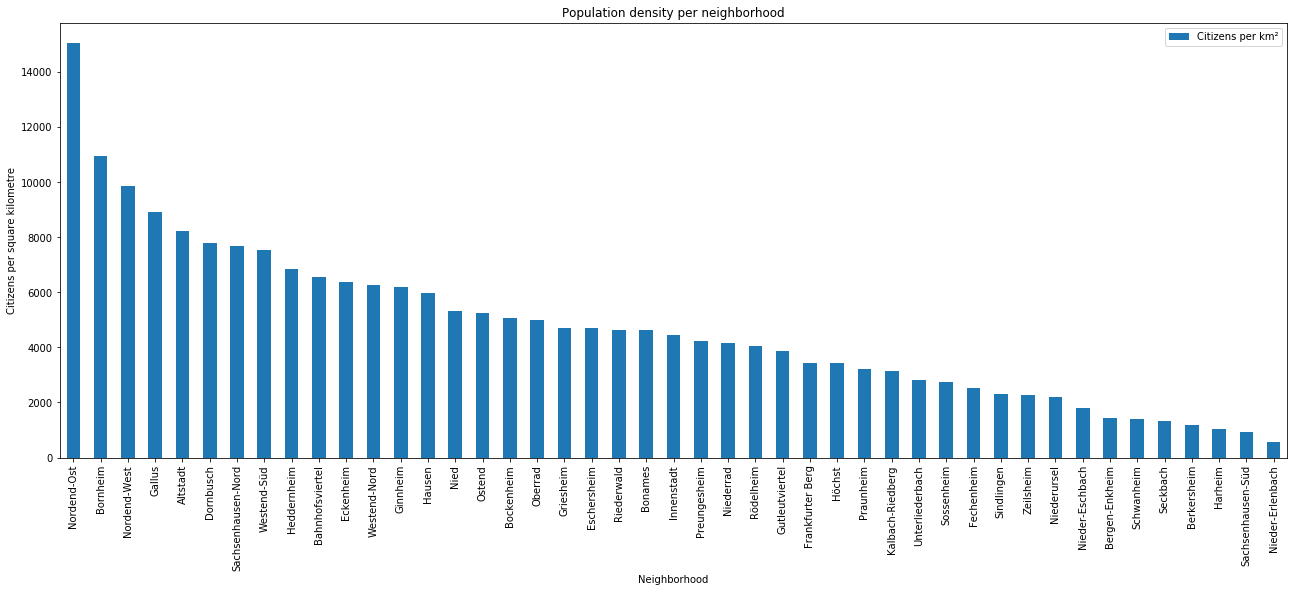

In [13]:
df_plot1.plot(kind='bar',
            figsize = (22,8))


plt.title("Population density per neighborhood")
plt.ylabel("Citizens per square kilometre")

plt.show()

**Venue analysis**
Venues within a radius of 600 metres are sourced from Foursquare via an API. The assumption is that citizens are likely to explore their neighborhood within a radius of 600 metres which is an reasonable distance that people walk by feet. 916 venues are sourced in total whereby they are clustered in 196 unique categories. The map shows all venues according their geographical coordinates in the city area.


In [14]:
#Define Foursquare credentials and versions

CLIENT_ID = '15IDI3O4ZIDUZ1AANVSJYV3SZ00VNZC031TWV0AH2XAIX3F3' # your Foursquare ID
CLIENT_SECRET = '24CQ3VZMKAZHU1DGB1PIPIX2XRW12VQFFYMCOXZMF5RUKG1J' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 15IDI3O4ZIDUZ1AANVSJYV3SZ00VNZC031TWV0AH2XAIX3F3
CLIENT_SECRET:24CQ3VZMKAZHU1DGB1PIPIX2XRW12VQFFYMCOXZMF5RUKG1J


In [15]:
#Function that requests all venues for a given neighborhood in a specific radius
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
#Run the function and collect the data in a new dataframe
import requests # library to handle requests

ffm_venues = getNearbyVenues(names=df_new['Neighborhood'],
                                   latitudes=df_new['Latitude'],
                                   longitudes=df_new['Longitude']
                                  )



Altstadt
Innenstadt
Bahnhofsviertel
Westend-Süd
Westend-Nord
Nordend-West
Nordend-Ost
Ostend
Bornheim
Gutleutviertel
Gallus
Bockenheim
Sachsenhausen-Nord
Sachsenhausen-Süd
Oberrad
Niederrad
Schwanheim
Griesheim
Rödelheim
Hausen
Praunheim
Heddernheim
Niederursel
Ginnheim
Dornbusch
Eschersheim
Eckenheim
Preungesheim
Bonames
Berkersheim
Riederwald
Seckbach
Fechenheim
Höchst
Nied
Sindlingen
Zeilsheim
Unterliederbach
Sossenheim
Nieder-Erlenbach
Kalbach-Riedberg
Harheim
Nieder-Eschbach
Bergen-Enkheim
Frankfurter Berg


In [17]:
#Overview on all sourced venues

print(ffm_venues.shape)
ffm_venues.head()

(916, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt,50.110442,8.682901,Römerberg,50.110489,8.682131,Plaza
1,Altstadt,50.110442,8.682901,SCHIRN Kunsthalle,50.110291,8.683542,Art Museum
2,Altstadt,50.110442,8.682901,Dom Aussichtsplattform,50.110609,8.684908,Scenic Lookout
3,Altstadt,50.110442,8.682901,Weinterasse Rollanderhof,50.112473,8.682164,Wine Bar
4,Altstadt,50.110442,8.682901,Main,50.108390,8.682631,River


In [18]:
# create map of Frankfurt with all venues
map_venue = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, venue in zip(ffm_venues['Venue Latitude'], ffm_venues['Venue Longitude'], ffm_venues['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=0.5,
        popup=label,
        color='darkblue',
        fill=True,
        fill_color='darkblue',
        fill_opacity=0.8,
        parse_html=False).add_to(map_venue)  


map_venue

In a subsequent step, all neighborhoods are listed depending their absolute number of venues wihtin a radius of 600 metres. It is imortant to mention that the three neighborhoods *Altstadt*, *Innenstadt* and *Bahnhofsviertel* reach the limit of 100 venues that can be requested from Foursquare using the free account. While the average of venues per radius is 20, the five neighberhoods with the most venues are significantly above the average. The bar chart shows a very unequal distribution of venues per neigherhood. However, the data is consistence with the map that shows all venues in Frankfurt, as it can be seen that there are above-average number of venues in neighberhood close or within the city centre. 

In [19]:
#The number of unique categories and venues for each Neighborhood

print('There are {} uniques categories.'.format(len(ffm_venues['Venue Category'].unique())))
ffm_absolute = ffm_venues.groupby('Neighborhood').count()
ffm_absolute.head()

There are 196 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Altstadt,100,100,100,100,100,100
Bahnhofsviertel,100,100,100,100,100,100
Bergen-Enkheim,2,2,2,2,2,2
Berkersheim,2,2,2,2,2,2
Bockenheim,37,37,37,37,37,37


In [20]:
import matplotlib as mlp
import matplotlib.pyplot as plt

ffm_plot = ffm_absolute[['Venue Category']]
ffm_plot.sort_values(by=['Venue Category'], ascending = False, inplace = True)
print(ffm_plot.mean())
ffm_plot.head()

Venue Category    20.355556
dtype: float64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Venue Category
Neighborhood,
Altstadt,100
Bahnhofsviertel,100
Innenstadt,100
Nordend-Ost,79
Nordend-West,47


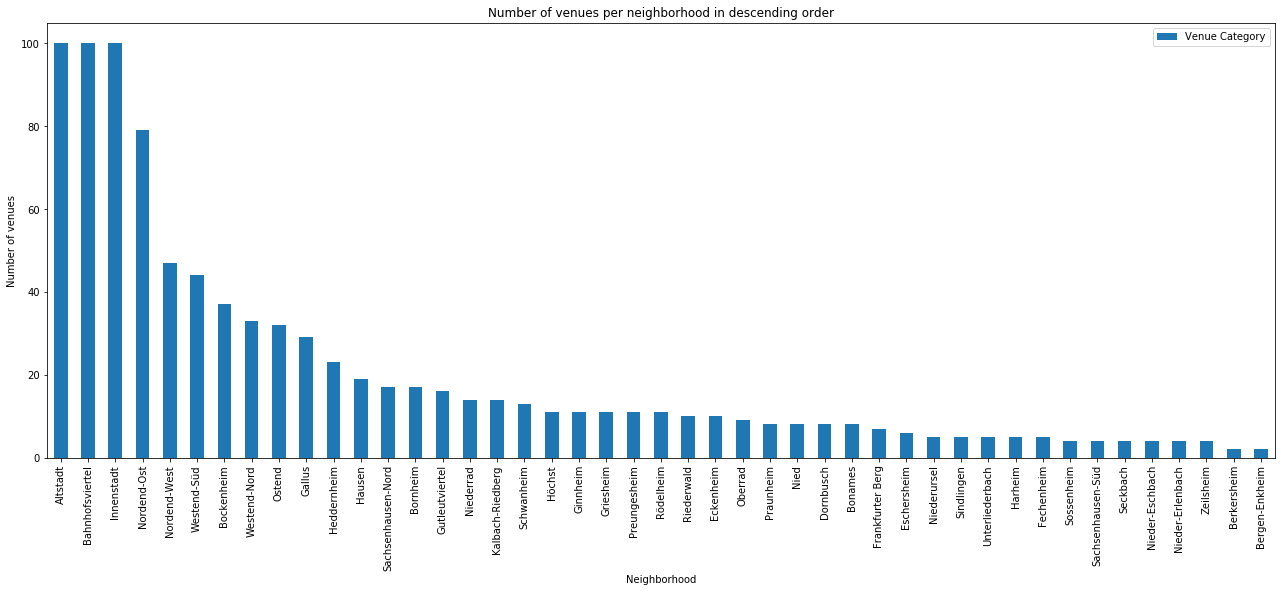

In [21]:
ffm_plot.plot(kind='bar',
             figsize = (22,8))


plt.title("Number of venues per neighborhood in descending order")
plt.ylabel("Number of venues")

plt.show()

**K-mean clustering**
<br>K-means clustering is an unsupervised ML algorithm that enable clustering of objects depending on a pre-defined criteria. In this case, each neighborhood is listed with its 10 most common venues and afterwards clustered into 10 distinctive groups. The result is shown in a map with each cluster highlighted by another color. Of particular interest are the clusters 1 and 4. 
<br> Cluster 1: 13 neighborhoods fall into the cluster 1. Supermarkets, restaurants and public transport stations represent the most common venues in those areas. Observing the location data, cluster 1 neighborhoods are predominantly in the west and north of the city surrounding the city centre. 
<br> Cluster 4: 18 neighborhoods fall into the clsuter 4. Those neighborhoods are predominantly located in the city centre, with Cafés, Restaurant and Bars representing the most common venues. 

In [22]:
# one hot encoding
ffm_onehot = pd.get_dummies(ffm_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ffm_onehot['Neighborhood'] = ffm_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ffm_onehot.columns[-1]] + list(ffm_onehot.columns[:-1])
ffm_onehot = ffm_onehot[fixed_columns]

print(ffm_onehot.shape)
ffm_onehot.head()

(916, 197)


,Neighborhood,African Restaurant,Alternative Healer,American Restaurant,Apple Wine Pub,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Altstadt,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Altstadt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Group rows by neighborhood and by taking the mean of the frequency of occurance of each category

ffm_grouped = ffm_onehot.groupby('Neighborhood').mean().reset_index()

print(ffm_grouped.shape)
ffm_grouped

(45, 197)


,Neighborhood,African Restaurant,Alternative Healer,American Restaurant,Apple Wine Pub,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop
0,Altstadt,0.00,0.0,0.000000,0.000000,0.01000,0.040000,0.000000,0.000000,0.01,...,0.000,0.000000,0.000000,0.010000,0.01,0.010000,0.00,0.00,0.020000,0.00000
1,Bahnhofsviertel,0.01,0.0,0.000000,0.000000,0.00000,0.010000,0.020000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.01,0.030000,0.01,0.01,0.000000,0.00000
2,Bergen-Enkheim,0.00,0.5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000
3,Berkersheim,0.00,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000
4,Bockenheim,0.00,0.0,0.000000,0.000000,0.00000,0.000000,0.108108,0.000000,0.00,...,0.000,0.000000,0.000000,0.027027,0.00,0.000000,0.00,0.00,0.027027,0.00000
5,Bonames,0.00,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000
6,Bornheim,0.00,0.0,0.000000,0.058824,0.00000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.058824,0.00000
7,Dornbusch,0.00,0.0,0.000000,0.000000,0.00000,0.000000,0.125000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000
8,Eckenheim,0.00,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000
9,Eschersheim,0.00,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,...,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00000


In [24]:
#Print each Neighborhood with the top 5 most common venues

num_top_venues = 5

for hood in ffm_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ffm_grouped[ffm_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Altstadt----
               venue  freq
0               Café  0.10
1  German Restaurant  0.05
2         Restaurant  0.05
3           Boutique  0.04
4         Art Museum  0.04


----Bahnhofsviertel----
                venue  freq
0               Hotel  0.11
1   Indian Restaurant  0.06
2                Café  0.05
3                 Bar  0.05
4  Seafood Restaurant  0.03


----Bergen-Enkheim----
                        venue  freq
0                       Plaza   0.5
1          Alternative Healer   0.5
2                    Platform   0.0
3             Other Nightlife   0.0
4  Modern European Restaurant   0.0


----Berkersheim----
                        venue  freq
0           German Restaurant   0.5
1  Construction & Landscaping   0.5
2          African Restaurant   0.0
3                        Park   0.0
4         Moroccan Restaurant   0.0


----Bockenheim----
                venue  freq
0                Café  0.11
1    Asian Restaurant  0.11
2  Italian Restaurant  0.05
3      Ice Crea

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
#Create a dataframe with each neighborhood and its top 10 most visited venues

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ffm_grouped['Neighborhood']

for ind in np.arange(ffm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ffm_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt,Café,Restaurant,German Restaurant,Plaza,Bar,Boutique,Art Museum,Coffee Shop,Hotel,Burger Joint
1,Bahnhofsviertel,Hotel,Indian Restaurant,Bar,Café,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant,Restaurant,Convenience Store
2,Bergen-Enkheim,Alternative Healer,Plaza,Wine Shop,Event Service,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot,Fast Food Restaurant
3,Berkersheim,Construction & Landscaping,German Restaurant,Wine Shop,Event Space,French Restaurant,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot
4,Bockenheim,Café,Asian Restaurant,Middle Eastern Restaurant,Spanish Restaurant,Platform,Supermarket,Bakery,Ice Cream Shop,Italian Restaurant,Radio Station
5,Bonames,Metro Station,Doner Restaurant,Café,German Restaurant,Italian Restaurant,Bakery,Ice Cream Shop,Donut Shop,Fast Food Restaurant,French Restaurant
6,Bornheim,Italian Restaurant,Malga,Irish Pub,Spanish Restaurant,German Restaurant,Supermarket,Gymnastics Gym,Bakery,Pool,Gym / Fitness Center
7,Dornbusch,Supermarket,Soccer Field,Dessert Shop,Gas Station,Asian Restaurant,Park,Farmers Market,Event Space,Fountain,Football Stadium
8,Eckenheim,Metro Station,Soccer Field,Market,Drugstore,Cajun / Creole Restaurant,Supermarket,German Restaurant,Gym / Fitness Center,Beer Garden,Fast Food Restaurant
9,Eschersheim,Bowling Alley,Pool,Stables,Supermarket,German Restaurant,Event Space,Fountain,Football Stadium,Food & Drink Shop,Food


In [27]:
#Run k-means to cluster neighborhood into 6 clusters

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


# set number of clusters
kclusters = 10

ffm_grouped_clustering = ffm_grouped.drop(['Neighborhood'], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ffm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 7, 0, 4, 4, 4, 1, 1, 1], dtype=int32)

In [28]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ffm_merged = df_new

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ffm_merged = ffm_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ffm_merged.head(40) # check the last columns!

,Number,Neighborhood,Citizens per km²,Neighborhood since,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Altstadt,8204,1866,"Altstadt, Frankfurt am Main, Germany",50.110442,8.682901,4,Café,Restaurant,German Restaurant,Plaza,Bar,Boutique,Art Museum,Coffee Shop,Hotel,Burger Joint
1,2,Innenstadt,4430,1866,"Innenstadt, Frankfurt am Main, Germany",50.112993,8.674341,4,Italian Restaurant,German Restaurant,Boutique,Plaza,Café,Steakhouse,Hotel,Bar,Restaurant,Japanese Restaurant
2,3,Bahnhofsviertel,6570,1866,"Bahnhofsviertel, Frankfurt am Main, Germany",50.107741,8.668676,4,Hotel,Indian Restaurant,Bar,Café,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant,Restaurant,Convenience Store
3,4,Westend-Süd,7538,1866,"Westend-Süd, Frankfurt am Main, Germany",50.115245,8.662270,4,Italian Restaurant,Steakhouse,Indian Restaurant,Café,Japanese Restaurant,French Restaurant,Asian Restaurant,Ramen Restaurant,Hotel,Plaza
4,5,Westend-Nord,6249,1866,"Westend-Nord, Frankfurt am Main, Germany",50.126356,8.667921,4,Italian Restaurant,Sushi Restaurant,Coffee Shop,Thai Restaurant,Bakery,Café,Bus Stop,Discount Store,Gastropub,Shoe Store
5,6,Nordend-West,9845,1866,"Nordend-West, Frankfurt am Main, Germany",50.124914,8.677950,4,Italian Restaurant,Café,Indian Restaurant,Health Food Store,Vietnamese Restaurant,Supermarket,Lounge,Organic Grocery,Bus Stop,Road
6,7,Nordend-Ost,15031,1866,"Nordend-Ost, Frankfurt am Main, Germany",50.124920,8.692317,4,Café,Italian Restaurant,Bakery,Ice Cream Shop,Vietnamese Restaurant,Pub,Pizza Place,Hookah Bar,Bar,Restaurant
7,8,Ostend,5243,1866,"Ostend, Frankfurt am Main, Germany",50.115935,8.720546,4,Supermarket,Café,Gym / Fitness Center,Italian Restaurant,Wine Shop,Furniture / Home Store,Plaza,Park,Nightclub,Motorcycle Shop
8,9,Bornheim,10959,1877,"Bornheim, Frankfurt am Main, Germany",50.133056,8.714932,4,Italian Restaurant,Malga,Irish Pub,Spanish Restaurant,German Restaurant,Supermarket,Gymnastics Gym,Bakery,Pool,Gym / Fitness Center
9,10,Gutleutviertel,3864,1866,"Gutleutviertel, Frankfurt am Main, Germany",50.097925,8.648964,4,American Restaurant,Nightclub,Train Station,Hotel,Park,German Restaurant,Event Space,Beer Garden,Rental Car Location,Harbor / Marina


In [46]:
#Visualize the clustered neighborhoods with different colors according their beloning to a cluster

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ffm_merged['Latitude'], ffm_merged['Longitude'], ffm_merged['Neighborhood'], ffm_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [30]:
#Examine cluster 1:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 0, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Berkersheim,50.171198,8.701223,0,Construction & Landscaping,German Restaurant,Wine Shop,Event Space,French Restaurant,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot


In [31]:
#Examine cluster 2:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 1, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Gallus,50.102309,8.631984,1,Supermarket,German Restaurant,Restaurant,Italian Restaurant,College Residence Hall,Grocery Store,Burger Joint,Karaoke Bar,Plaza,Bus Stop
19,Rödelheim,50.127886,8.604865,1,Supermarket,Bakery,Doner Restaurant,Bank,Thai Restaurant,Italian Restaurant,Bus Stop,Turkish Restaurant,Pet Store,Ice Cream Shop
20,Hausen,50.134155,8.625835,1,Metro Station,Bus Stop,Supermarket,Indian Restaurant,Grocery Store,Pool,Other Nightlife,Restaurant,Malay Restaurant,Garden
21,Praunheim,50.147195,8.616688,1,Supermarket,Gym,Café,Italian Restaurant,German Restaurant,Chinese Restaurant,Miscellaneous Shop,Wine Shop,Football Stadium,Food & Drink Shop
22,Heddernheim,50.158204,8.641507,1,German Restaurant,Supermarket,Clothing Store,Pizza Place,Thai Restaurant,Burger Joint,Fried Chicken Joint,Shopping Mall,Falafel Restaurant,Bookstore
23,Niederursel,50.168987,8.622340,1,German Restaurant,Pizza Place,Supermarket,Trail,Wine Shop,Event Service,Football Stadium,Food & Drink Shop,Food,Fishing Spot
24,Ginnheim,50.145069,8.649053,1,Supermarket,German Restaurant,Bakery,Doner Restaurant,Italian Restaurant,Trattoria/Osteria,Asian Restaurant,Plaza,Music Store,Food
25,Dornbusch,50.147170,8.669729,1,Supermarket,Soccer Field,Dessert Shop,Gas Station,Asian Restaurant,Park,Farmers Market,Event Space,Fountain,Football Stadium
26,Eschersheim,50.161205,8.662839,1,Bowling Alley,Pool,Stables,Supermarket,German Restaurant,Event Space,Fountain,Football Stadium,Food & Drink Shop,Food
27,Eckenheim,50.151563,8.682371,1,Metro Station,Soccer Field,Market,Drugstore,Cajun / Creole Restaurant,Supermarket,German Restaurant,Gym / Fitness Center,Beer Garden,Fast Food Restaurant


In [32]:
#Examine cluster 3:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 2, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Sachsenhausen-Süd,50.070725,8.68545,2,Lake,German Restaurant,Food,Tram Station,Wine Shop,Fountain,Football Stadium,Food & Drink Shop,Fishing Spot,Fast Food Restaurant


In [33]:
#Examine cluster 4:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 3, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Sachsenhausen-Nord,50.097813,8.673362,3,Café,Tram Station,Hotel,Italian Restaurant,Spa,German Restaurant,Light Rail Station,Greek Restaurant,Supermarket,Gym
15,Oberrad,50.098791,8.727403,3,Tram Station,Ice Cream Shop,Laundry Service,Hotel,Plaza,Market,German Restaurant,Greek Restaurant,Food & Drink Shop,Food
17,Schwanheim,50.082955,8.578917,3,German Restaurant,Athletics & Sports,Tram Station,Museum,Thai Restaurant,Drugstore,Café,Restaurant,Supermarket,Park
18,Griesheim,50.101970,8.599960,3,Tram Station,Asian Restaurant,Event Service,Automotive Shop,Auto Workshop,Supermarket,Fast Food Restaurant,Restaurant,Gas Station,Middle Eastern Restaurant
28,Preungesheim,50.153425,8.699084,3,Supermarket,Tram Station,Market,Park,Shipping Store,Drugstore,Post Office,Shopping Mall,Ice Cream Shop,Dog Run
35,Nied,50.102597,8.570502,3,Tram Station,Supermarket,River,German Restaurant,Light Rail Station,Bar,Wine Shop,Football Stadium,Food & Drink Shop,Food


In [34]:
#Examine cluster 5:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 4, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt,50.110442,8.682901,4,Café,Restaurant,German Restaurant,Plaza,Bar,Boutique,Art Museum,Coffee Shop,Hotel,Burger Joint
1,Innenstadt,50.112993,8.674341,4,Italian Restaurant,German Restaurant,Boutique,Plaza,Café,Steakhouse,Hotel,Bar,Restaurant,Japanese Restaurant
2,Bahnhofsviertel,50.107741,8.668676,4,Hotel,Indian Restaurant,Bar,Café,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Seafood Restaurant,Restaurant,Convenience Store
3,Westend-Süd,50.115245,8.662270,4,Italian Restaurant,Steakhouse,Indian Restaurant,Café,Japanese Restaurant,French Restaurant,Asian Restaurant,Ramen Restaurant,Hotel,Plaza
4,Westend-Nord,50.126356,8.667921,4,Italian Restaurant,Sushi Restaurant,Coffee Shop,Thai Restaurant,Bakery,Café,Bus Stop,Discount Store,Gastropub,Shoe Store
5,Nordend-West,50.124914,8.677950,4,Italian Restaurant,Café,Indian Restaurant,Health Food Store,Vietnamese Restaurant,Supermarket,Lounge,Organic Grocery,Bus Stop,Road
6,Nordend-Ost,50.124920,8.692317,4,Café,Italian Restaurant,Bakery,Ice Cream Shop,Vietnamese Restaurant,Pub,Pizza Place,Hookah Bar,Bar,Restaurant
7,Ostend,50.115935,8.720546,4,Supermarket,Café,Gym / Fitness Center,Italian Restaurant,Wine Shop,Furniture / Home Store,Plaza,Park,Nightclub,Motorcycle Shop
8,Bornheim,50.133056,8.714932,4,Italian Restaurant,Malga,Irish Pub,Spanish Restaurant,German Restaurant,Supermarket,Gymnastics Gym,Bakery,Pool,Gym / Fitness Center
9,Gutleutviertel,50.097925,8.648964,4,American Restaurant,Nightclub,Train Station,Hotel,Park,German Restaurant,Event Space,Beer Garden,Rental Car Location,Harbor / Marina


In [35]:
#Examine cluster 6:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 5, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Fechenheim,50.125883,8.757116,5,Furniture / Home Store,Gym Pool,Gourmet Shop,Tram Station,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot,Fast Food Restaurant


In [36]:
#Examine cluster 7:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 6, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Seckbach,50.143428,8.725886,6,Plaza,Photography Studio,Dog Run,German Restaurant,Wine Shop,Event Service,Football Stadium,Food & Drink Shop,Food,Fishing Spot


In [37]:
#Examine cluster 8:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 7, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,Bergen-Enkheim,50.158015,8.762039,7,Alternative Healer,Plaza,Wine Shop,Event Service,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot,Fast Food Restaurant


In [38]:
#Examine cluster 9:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 8, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Zeilsheim,50.097531,8.495772,8,Bakery,Home Service,German Restaurant,Supermarket,Event Service,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot
40,Nieder-Erlenbach,50.208650,8.706859,8,Bakery,Hotel,German Restaurant,Supermarket,Event Service,Fountain,Football Stadium,Food & Drink Shop,Food,Fishing Spot


In [39]:
#Examine cluster 10:
ffm_merged.loc[ffm_merged['Cluster Labels'] == 9, ffm_merged.columns[[1] + list(range(5, ffm_merged.shape[1]))]]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,Sossenheim,50.121087,8.573314,9,Ice Cream Shop,Bus Stop,Gas Station,Nightclub,Event Space,Football Stadium,Food & Drink Shop,Food,Fishing Spot,Fast Food Restaurant


## Section 6: Conclusion

When chosing a neighborhood for living, citizens can chose between 45 neighborhoods in Frankfurt am Main. The question remains, which one is most attractive in terms of venue opportunities in nearby areas. 
<br><br>Observing the geograchical spread of neighborhoods, the map shows that neighborhoods become smaller and more aggregated in the centre of the city. Those are also the neighborhoods that show above average population density.
<br><br>Showing the absolute number of venues per neighborhood within a radius of 600 metres shows three neighborhoods with at least 100 venues. Since 100 is the maximum that can be requested via Foursquare for each point of location, the exact number within this radius can´t be retrieved. However, it shows a very high density of opportunities for going-out. Assuming that students and young professionals are looking for such a variety, those neighborhood with a high density of venues are more attractive than others. 
<br><br>Comparing the results of the neighborhood clustering shows that neighborhoods in cluster 4 are predominantly characterised by a large number of cafés, restaurants and bars. Those venues are especially for young people of particular interest, as those are places to meet with friends, explore the city or meet new people. 

**Limitations**
<br>The decision for a specific location for the place of living is based on more criteria than they are observed within this analysis. Observing the impact of other factors such as distance to place of work would be highly interesting for further research. 